In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "/kaggle/input/plant-disease-recognition-dataset/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [4]:
path = "/kaggle/input/plant-disease-recognition-dataset/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [5]:
path = "/kaggle/input/plant-disease-recognition-dataset/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [6]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [7]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


## Data Preprocessing

In [8]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[ 70.04297  123.04297   51.04297 ]
  [ 71.15625  125.15625   50.15625 ]
  [ 74.5625   126.5625    54.5625  ]
  ...
  [184.       222.       173.      ]
  [193.26367  230.26367  176.26367 ]
  [201.97461  236.97461  178.97461 ]]

 [[ 71.322266 124.42969   52.10742 ]
  [ 69.49805  122.49805   52.810547]
  [ 77.79492  129.10742   61.95117 ]
  ...
  [177.80664  215.49414  167.91211 ]
  [193.37305  231.37305  172.26758 ]
  [200.95117  235.95117  177.95117 ]]

 [[ 73.06836  126.75586   52.69336 ]
  [ 71.71289  124.71289   56.71289 ]
  [ 70.79297  123.79297   55.79297 ]
  ...
  [177.74023  217.92773  173.92773 ]
  [190.       227.       174.1875  ]
  [200.09375  235.09375  177.09375 ]]

 ...

 [[ 68.896484 118.271484  31.583984]
  [ 76.09375  121.09375   36.09375 ]
  [ 77.177734 125.177734  39.177734]
  ...
  [ 67.228516 123.228516  86.228516]
  [ 65.48828  121.48828   82.48828 ]
  [ 69.21289  127.21289   87.21289 ]]

 [[ 67.30859  115.52344   31.103516]
  [ 72.083984 117.083984  

## Train Image Data

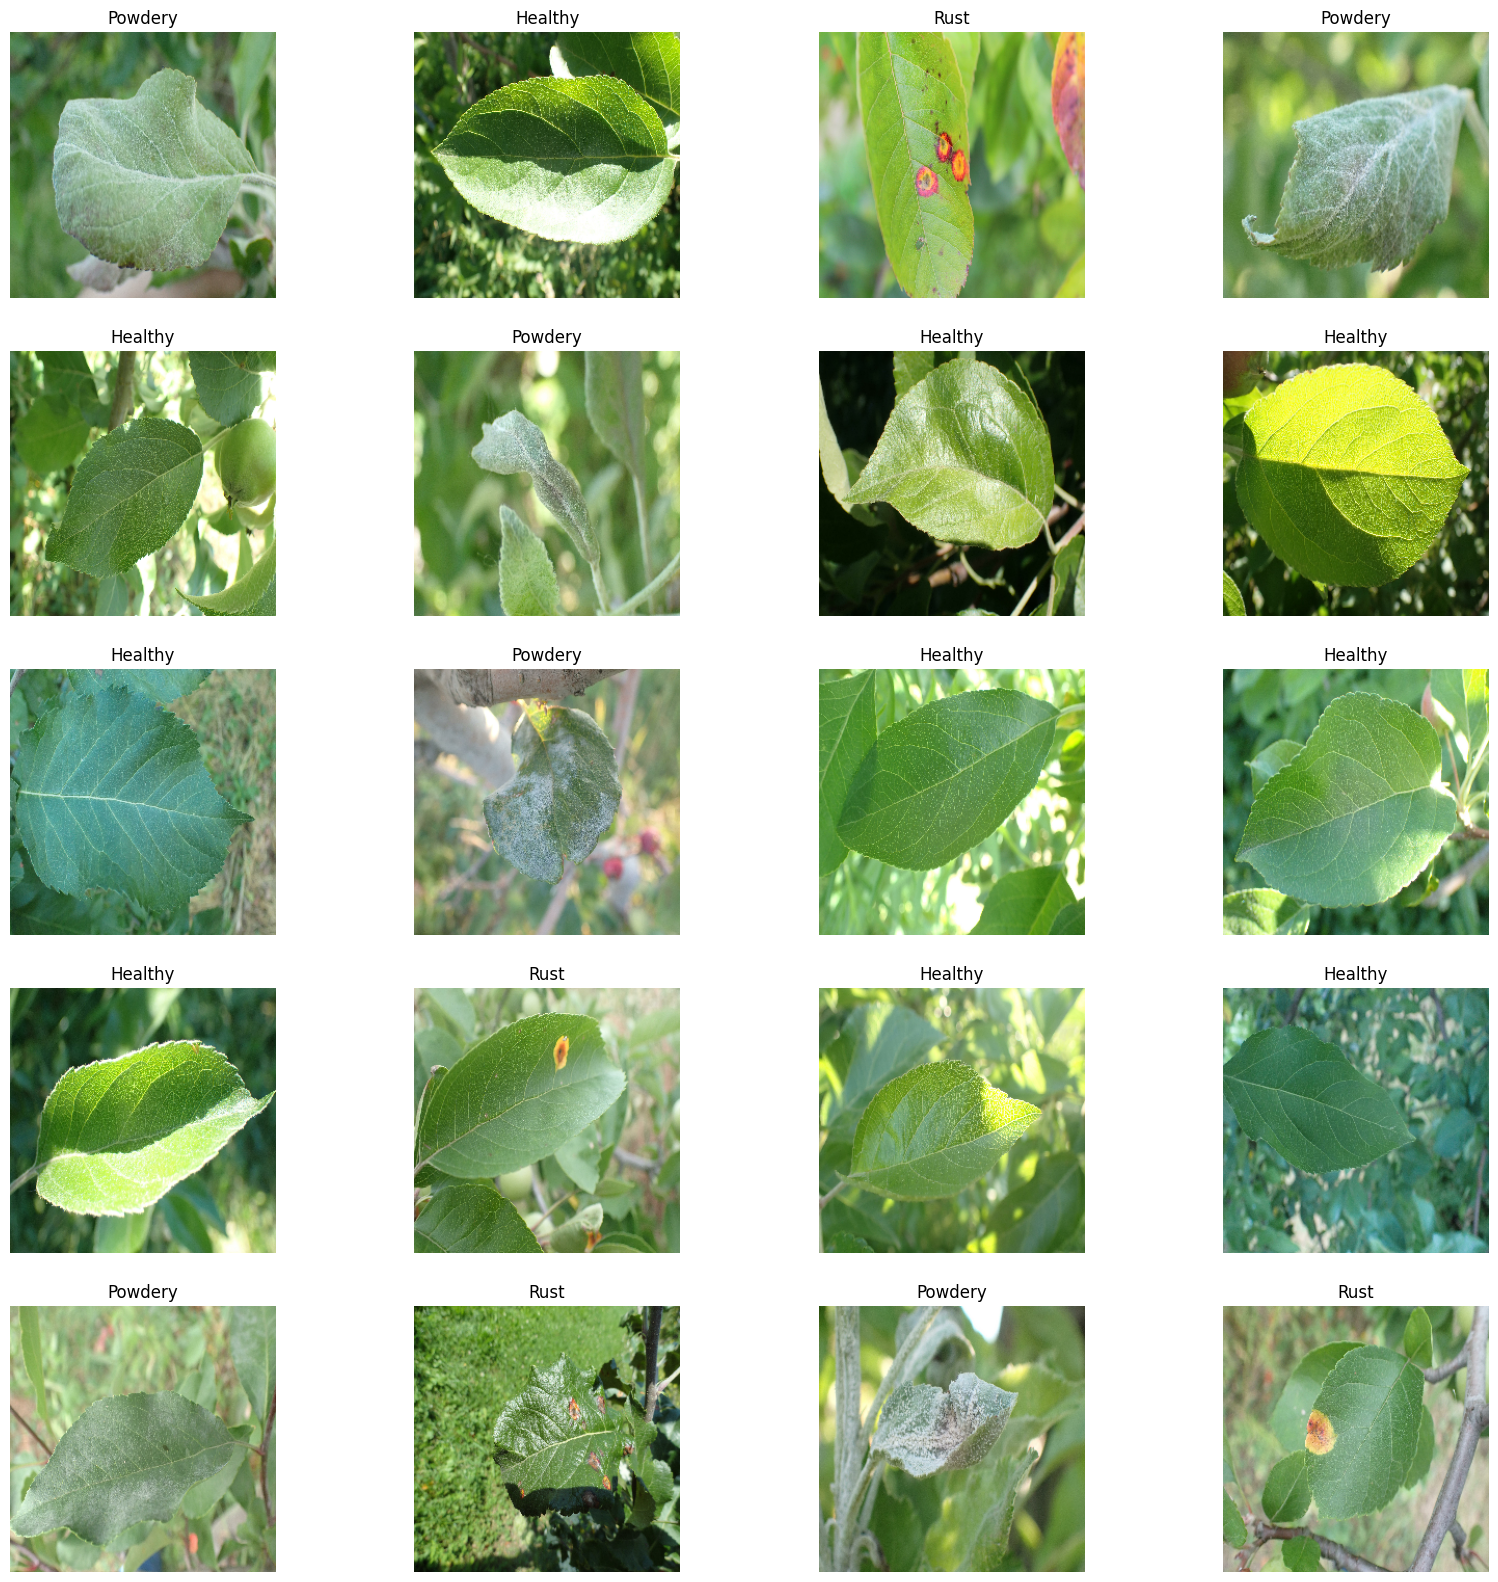

In [9]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [10]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

## Creat CNN Model 

In [12]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 3  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 4  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [14]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 [==============================] - 199s 4s/step - loss: 0.9670 - accuracy: 0.4841 - val_loss: 0.6980 - val_accuracy: 0.6000
Epoch 2/10
42/42 [==============================] - 194s 4s/step - loss: 0.7307 - accuracy: 0.6339 - val_loss: 0.5396 - val_accuracy: 0.7333
Epoch 3/10
42/42 [==============================] - 192s 4s/step - loss: 0.5058 - accuracy: 0.8245 - val_loss: 0.6700 - val_accuracy: 0.7667
Epoch 4/10
42/42 [==============================] - 191s 4s/step - loss: 0.4250 - accuracy: 0.8593 - val_loss: 0.2958 - val_accuracy: 0.9000
Epoch 5/10
42/42 [==============================] - 190s 4s/step - loss: 0.4150 - accuracy: 0.8540 - val_loss: 0.2820 - val_accuracy: 0.9167
Epoch 6/10
42/42 [==============================] - 191s 4s/step - loss: 0.3549 - accuracy: 0.8896 - val_loss: 0.5535 - val_accuracy: 0.8167
Epoch 7/10
42/42 [==============================] - 190s 4s/step - loss: 0.3223 - accuracy: 0.9077 - val_loss: 0.2043 - val_accuracy: 0.9500
Epoch 8/10
42

## Accuracy and loss on Train and Test

In [15]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 71s 2s/step - loss: 0.2707 - accuracy: 0.9100
Loss on Train data: 0.27072444558143616
Accuracy on Train data: 0.9099848866462708
5/5 [==============================] - 8s 915ms/step - loss: 0.2817 - accuracy: 0.8867
Loss on Test data: 0.2817312777042389
Accuracy on Test data: 0.8866666555404663


In [16]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

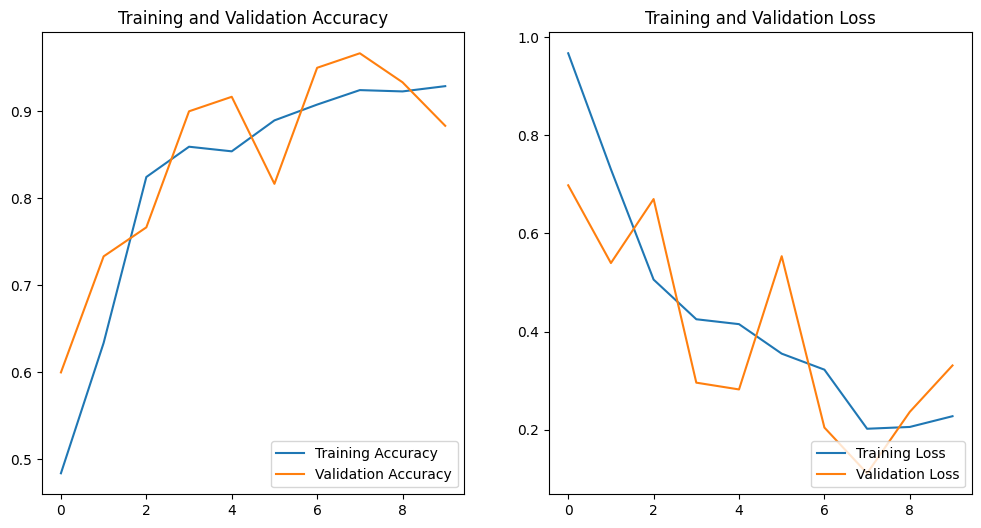

In [17]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [18]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class , confidence

1/1 [==============================] - 0s 53ms/step


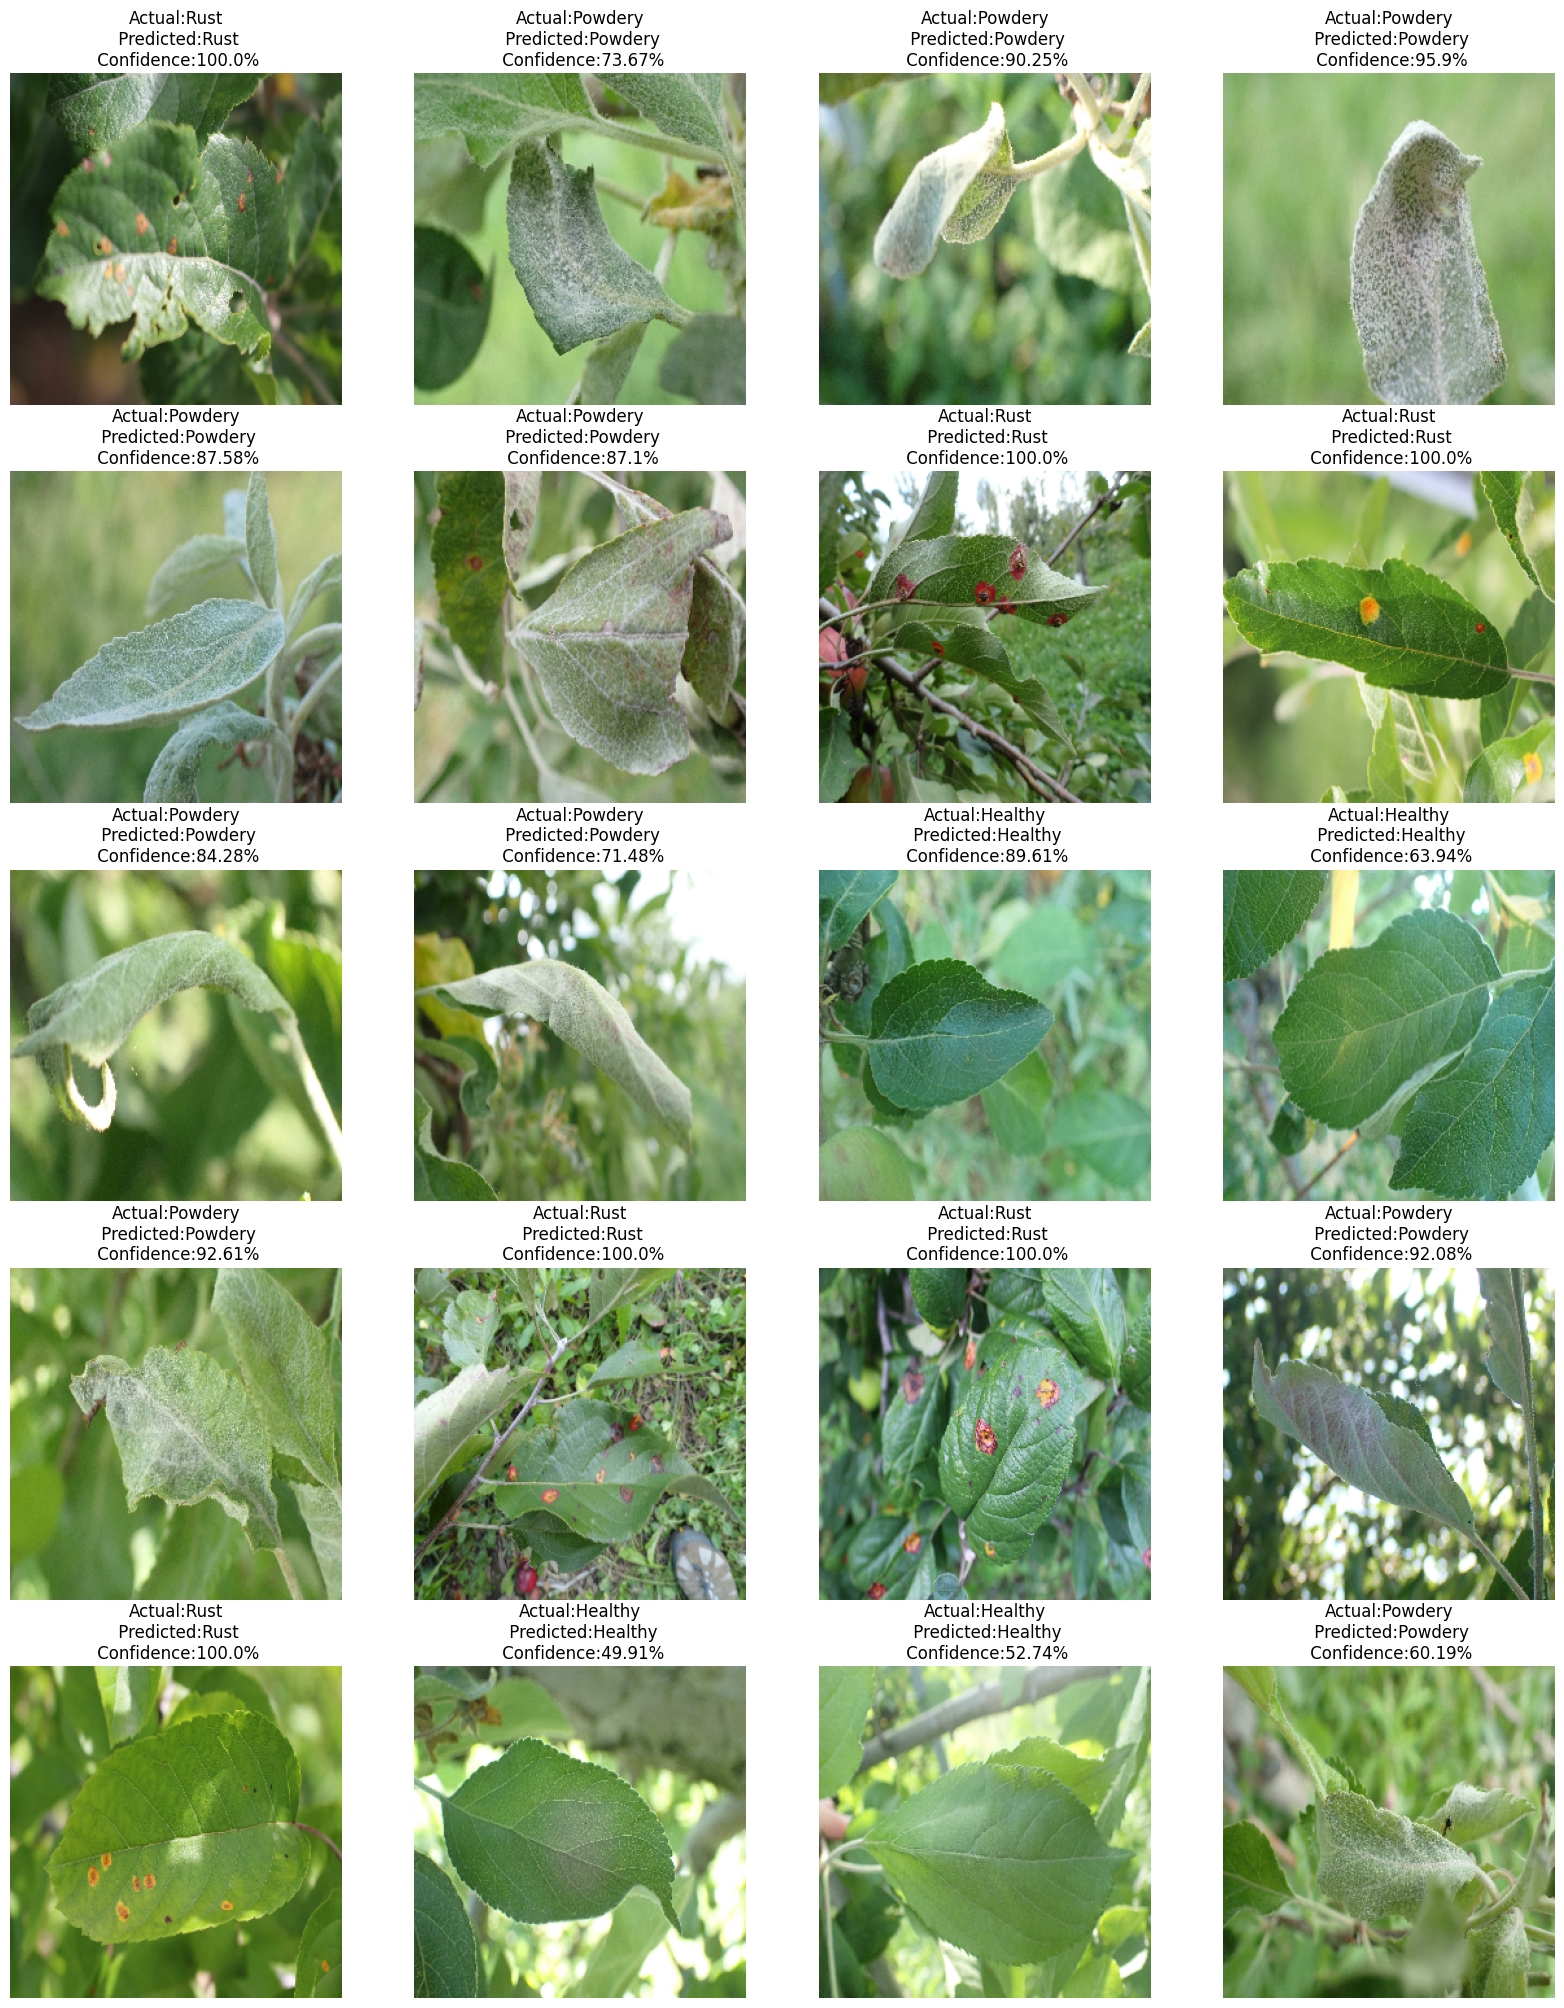

In [19]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")